In [1]:
import pandas as pd
from os import listdir
from os.path import isfile, join

dir = 'final/'
results_fps = [f for f in listdir(dir) if isfile(join(dir, f))]
results_fps

['Burger_etal_aucbandit_BiRRT.csv',
 'Burger_etal_aucbandit_RRTConnect.csv',
 'Burger_etal_default.csv',
 'Burger_etal_ompl.csv',
 'Burger_etal_rand_BiRRT.csv',
 'Burger_etal_rand_BKPiece.csv',
 'Burger_etal_rand_RRTConnect.csv',
 'Burger_etal_smac_BiRRT.csv',
 'Burger_etal_smac_BKPiece.csv',
 'Burger_etal_smac_RRTConnect.csv',
 'Burger_etal_tpe_BiRRT.csv',
 'Burger_etal_tpe_BKPiece.csv',
 'Burger_etal_tpe_RRTConnect.csv',
 'Cano_etal_aucbandit_BKPiece.csv',
 'Cano_etal_aucbandit_RRTConnect.csv',
 'Cano_etal_default.csv',
 'Cano_etal_gp_BKPiece.csv',
 'Cano_etal_gp_RRTConnect.csv',
 'Cano_etal_ompl.csv',
 'Cano_etal_rand_BKPiece.csv',
 'Cano_etal_rand_RRTConnect.csv',
 'Cano_etal_rf_BKPiece.csv',
 'Cano_etal_tpe_BKPiece.csv',
 'Cano_etal_tpe_RRTConnect.csv']

In [ ]:
planner_select = 'Burger_etal'

def comparison_plot(planner_select, planner):
    pass

for ps in ['Cano_etal', 'Burger_etal']:
    default_fn = planner_select+'_default.csv'
    default_df = pd.read_csv(join(dir, default_fn))
    planners = list(default_df['planner'])
    for p in planners:
        plot = comparison_plot(planner_select, p)

#     return plot


C:\Users\charl\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Cano_etal_aucbandit_BKPiece.csv
Cano_etal_aucbandit_BKPiece.csv
Cano_etal_gp_BKPiece.csv
Cano_etal_gp_BKPiece.csv
Cano_etal_rand_BKPiece.csv
Cano_etal_rand_BKPiece.csv
Cano_etal_tpe_BKPiece.csv
Cano_etal_tpe_BKPiece.csv


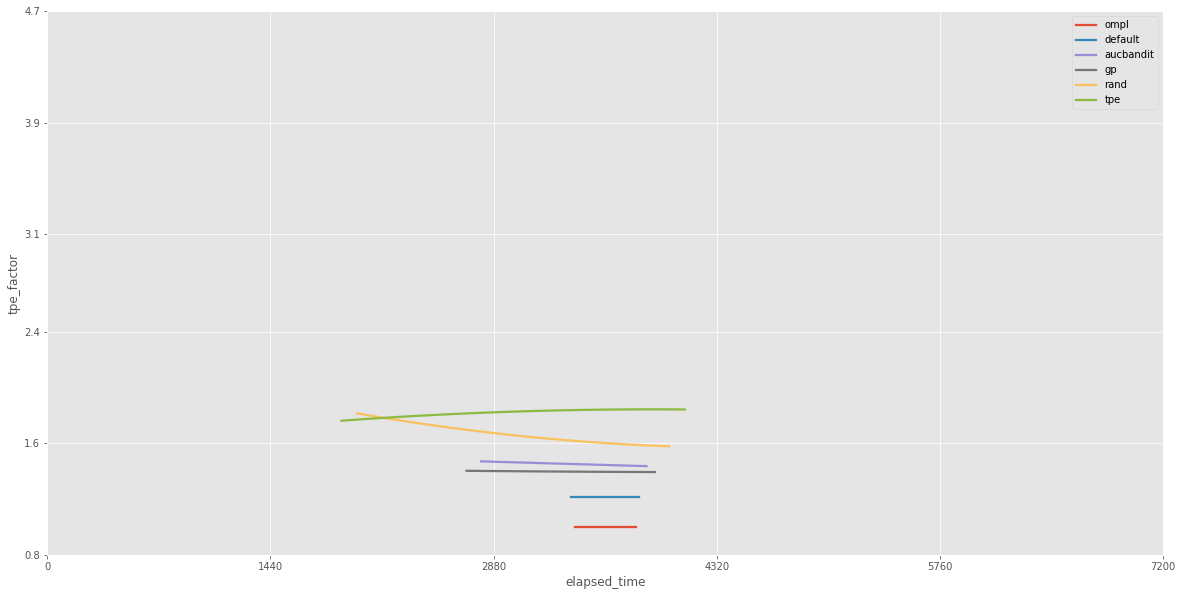

In [12]:
import re
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline
plt.rcParams["figure.figsize"] = [20,10]

# for f in results_fps:
#     if any(x in f for x in ["default", "ompl"]):
#         print(f)
# Read default df
planner_select = 'Cano_etal'


ompl_fn = planner_select+'_ompl.csv'
ompl_df = pd.read_csv(join(dir, ompl_fn))
planners = list(ompl_df['planner'])
# for p in planners:
#

# def comparison_plot(planner_select, planner):
planner = planners[0]
elapsed_time = np.linspace(0, 7200, 500)

ompl = float(ompl_df[(ompl_df['planner'] == planner)]['t_avg_plan_time'])
ompl_df = pd.DataFrame({'elapsed_time': elapsed_time, 'ompl': ompl})
ompl_df['ompl'] = ompl/ompl_df['ompl']
#plt.plot('elapsed_time', 'ompl', data=ompl_df)
sns.regplot(x='elapsed_time',y='ompl',data=ompl_df, fit_reg=True, label='ompl',
           scatter=False) 


default_fn = planner_select+'_default.csv'
default_df = pd.read_csv(join(dir, default_fn))
default = float(default_df[(default_df['planner'] == planner)]['t_avg_plan_time'])
default_df = pd.DataFrame({'elapsed_time': elapsed_time, 'default': default})
default_df['default'] = ompl/default_df['default']
#plt.plot('elapsed_time', 'default', data=default_df)
sns.regplot(x='elapsed_time',y='default',data=default_df, fit_reg=True, label='default',
           scatter=False) 

# Planner select filepaths
ps_fps = []
modes = []
for f in results_fps:
    if not any(x in f for x in ['default', 'ompl', 'rf']):
        if planner_select in f:
            ps_fps.append(f)
            # f = <planner_select>_<mode>_<planner>.csv
            fn = f.split('_')
            planner_fn = fn[-1].split('.')[-2]
            mode = fn[2]
            # Filtering fns for selected planner
            if re.search(planner_fn, planner, re.IGNORECASE):
                print(f)
                mode_df = pd.read_csv(join(dir, f))
                mode_df.drop(mode_df[mode_df.loss == 3.0].index, inplace=True)
                mode_df.drop(mode_df[mode_df.loss >= ompl].index, inplace=True)
                mode_df = pd.DataFrame({'elapsed_time': mode_df['elapsed_time'], mode: mode_df['loss']})
                mode_df[mode+'_factor'] = ompl/mode_df[mode]
                print(f)
                #plt.plot('elapsed_time', mode+'_factor', data=mode_df)
                sns.regplot(x='elapsed_time',y=mode+'_factor',data=mode_df, fit_reg=True, label=mode, 
                            scatter=False, order=15, ci=None) 
                # sns.lmplot(x='elapsed_time',y=mode+'_factor',data=mode_df, order=5, scatter=True) 
                
plt.xticks([0, 1440, 2880, 4320, 5760, 7200])   
plt.yticks([0.8, 1.6, 2.4, 3.1, 3.9, 4.7])   
plt.legend()



In [ ]:
ps_fps


In [ ]:
f = ps_fps[1]
print(f)
df = pd.read_csv(join(dir, f))
df.insert(3, 'factor', ompl/df['loss'])
df.drop(df[df.loss == 3.0].index, inplace=True)
df.drop(df[df.loss >= ompl].index, inplace=True)

plt.plot('elapsed_time', 'ompl', data=ompl_df)
plt.plot('elapsed_time', 'factor', data=df)

In [ ]:
df

In [ ]:
print(default, ompl)